In [7]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential,regularizers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization
from keras.applications import ResNet50
from keras import layers,models
import matplotlib.pyplot as plt

In [8]:
a=tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/adityachavan/Downloads/archive (7) - Copy/Training",
    shuffle=True,
    seed=10,
    image_size=(299,299),
    batch_size=64
)
b=tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/adityachavan/Downloads/archive (7) - Copy/Testing",
    shuffle=True,
    seed=10,
    image_size=(299,299),
    batch_size=64
)

Found 8582 files belonging to 4 classes.
Found 1705 files belonging to 4 classes.


In [9]:
av=a.take(27)

In [10]:
def norm(i,l):
    i=tf.cast(i/255,tf.float32)
    return i,l

a=a.map(norm)
b=b.map(norm)
av=av.map(norm)

In [11]:
model = Sequential([
tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
),Dense(4,activation="softmax"),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1000)              23851784  
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 23855788 (91.00 MB)
Trainable params: 23821356 (90.87 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [12]:
e=EarlyStopping(monitor="val_loss",patience=3)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
x=model.fit(a,epochs=15,validation_data=av,callbacks=e)

Epoch 1/15
  3/135 [..............................] - ETA: 22:19 - loss: 1.3794 - accuracy: 0.4010

KeyboardInterrupt: 

In [ ]:
model.evaluate(b)

27/27 [==============================] - 2s 59ms/step - loss: 0.6357 - accuracy: 0.9267


[0.6356778740882874, 0.9266862273216248]

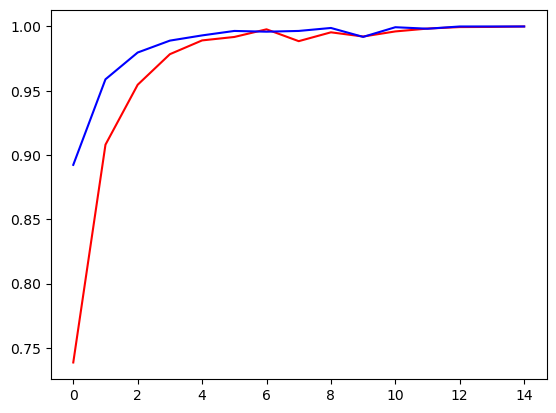

In [ ]:
plt.plot(x.history['accuracy'],color='red')
plt.plot(x.history['val_accuracy'],color='blue')


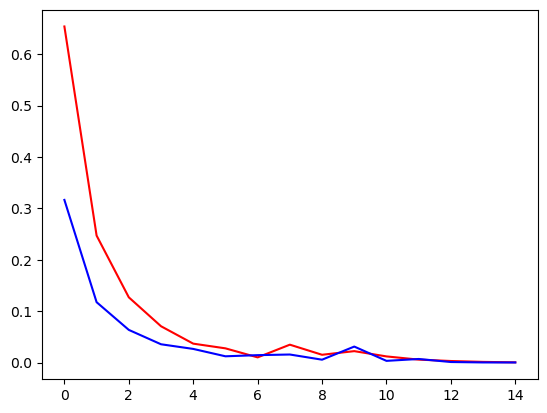

In [ ]:
plt.plot(x.history['loss'],color='red')
plt.plot(x.history['val_loss'],color='blue')

2024-03-05 14:58:11.531455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


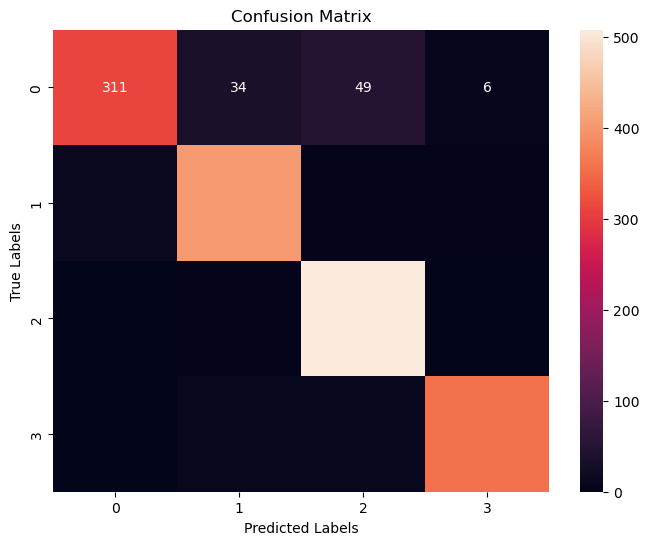

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
# Get the predicted labels for the test set
predicted_labels = []
true_labels = []

for images, labels in b:
    true_labels.extend(labels.numpy())
    predictions = m.predict(images, verbose=0)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# model_json = m.to_json()
# with open("/Users/Saumya/Downloads/Brain tumor/Modj/model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# m.save_weights("/Users/Saumya/Downloads/Brain tumor/Modj/model.h5")
# print("Saved model to disk")

Saved model to disk


In [ ]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(true_labels, predicted_labels)

# Print the report in a formatted way
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       400
           1       0.90      0.96      0.93       421
           2       0.89      1.00      0.94       510
           3       0.98      0.95      0.96       374

    accuracy                           0.93      1705
   macro avg       0.93      0.92      0.92      1705
weighted avg       0.93      0.93      0.92      1705



In [ ]:
a.class_names

['glioma', 'meningioma', 'no', 'pituitary']